# Black-Scholes and Cox-Ross-Rubinstein (CRR) Model:

In this Project, we will:
1. Compute European call option price using the Black-Scholes formula.
2. Compute the same using the Cox-Ross-Rubinstein (CRR) binomial tree model.
3. Analyze convergence of CRR prices to the Black-Scholes price.
4. Explore absolute/relative errors and visualize the odd-even oscillation in CRR.


## 1. Import Required Libraries

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import norm

## 2. Black-Scholes Formula for European Call Option

The Black-Scholes formula provides an analytical solution for European call options assuming constant volatility and risk-free rate.

In [ ]:
def black_scholes_call(S, K, T, r, sigma):
    """
    Compute European call option price using Black-Scholes formula.
    S: Current stock price
    K: Strike price
    T: Time to maturity (years)
    r: Risk-free rate
    sigma: Volatility
    """
    d1 = (np.log(S/K) + (r + 0.5*sigma**2)*T) / (sigma*np.sqrt(T))
    d2 = d1 - sigma*np.sqrt(T)
    call_price = S * norm.cdf(d1) - K * np.exp(-r*T) * norm.cdf(d2)
    return call_price

## 3. Set Option Parameters

In [ ]:
# Option parameters
S0 = 100      # Initial stock price
K = 100       # Strike price
T = 1         # Time to maturity (1 year)
r = 0.05      # Risk-free rate
sigma = 0.2   # Volatility

## 4. Calculate Black-Scholes Price

We compute the theoretical European call price using the Black-Scholes formula.

In [ ]:
bs_price = black_scholes_call(S0, K, T, r, sigma)
print(f"Black-Scholes price: {bs_price:.4f}")

Black-Scholes price: 10.4506


In [ ]:
# CRR convergence analysis
N_values = np.arange(10, 501, 10)  # Steps from 10 to 500
crr_prices = []
crr_errors = []

for N in N_values:
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    
    # Stock prices at maturity
    ST = S0 * (u ** np.arange(N, -1, -1)) * (d ** np.arange(0, N+1, 1))
    
    # Option values at maturity
    option_values = np.maximum(ST - K, 0)
    
    # Backward induction
    for i in range(N-1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[:-1] + (1-p) * option_values[1:])
    
    crr_prices.append(option_values[0])
    crr_errors.append(abs(option_values[0] - bs_price))

### Explanation:
- `u` and `d` are the up and down factors per step.
- `p` is the risk-neutral probability.
- We compute all stock prices at maturity and then use backward induction to get the present value.
- Errors are calculated as the absolute difference from the Black-Scholes price.

## 6. Plot Convergence and Errors

We will visualize:
1. CRR prices converging to Black-Scholes price.
2. Absolute errors.
3. Relative errors.
4. Log-log convergence rate.

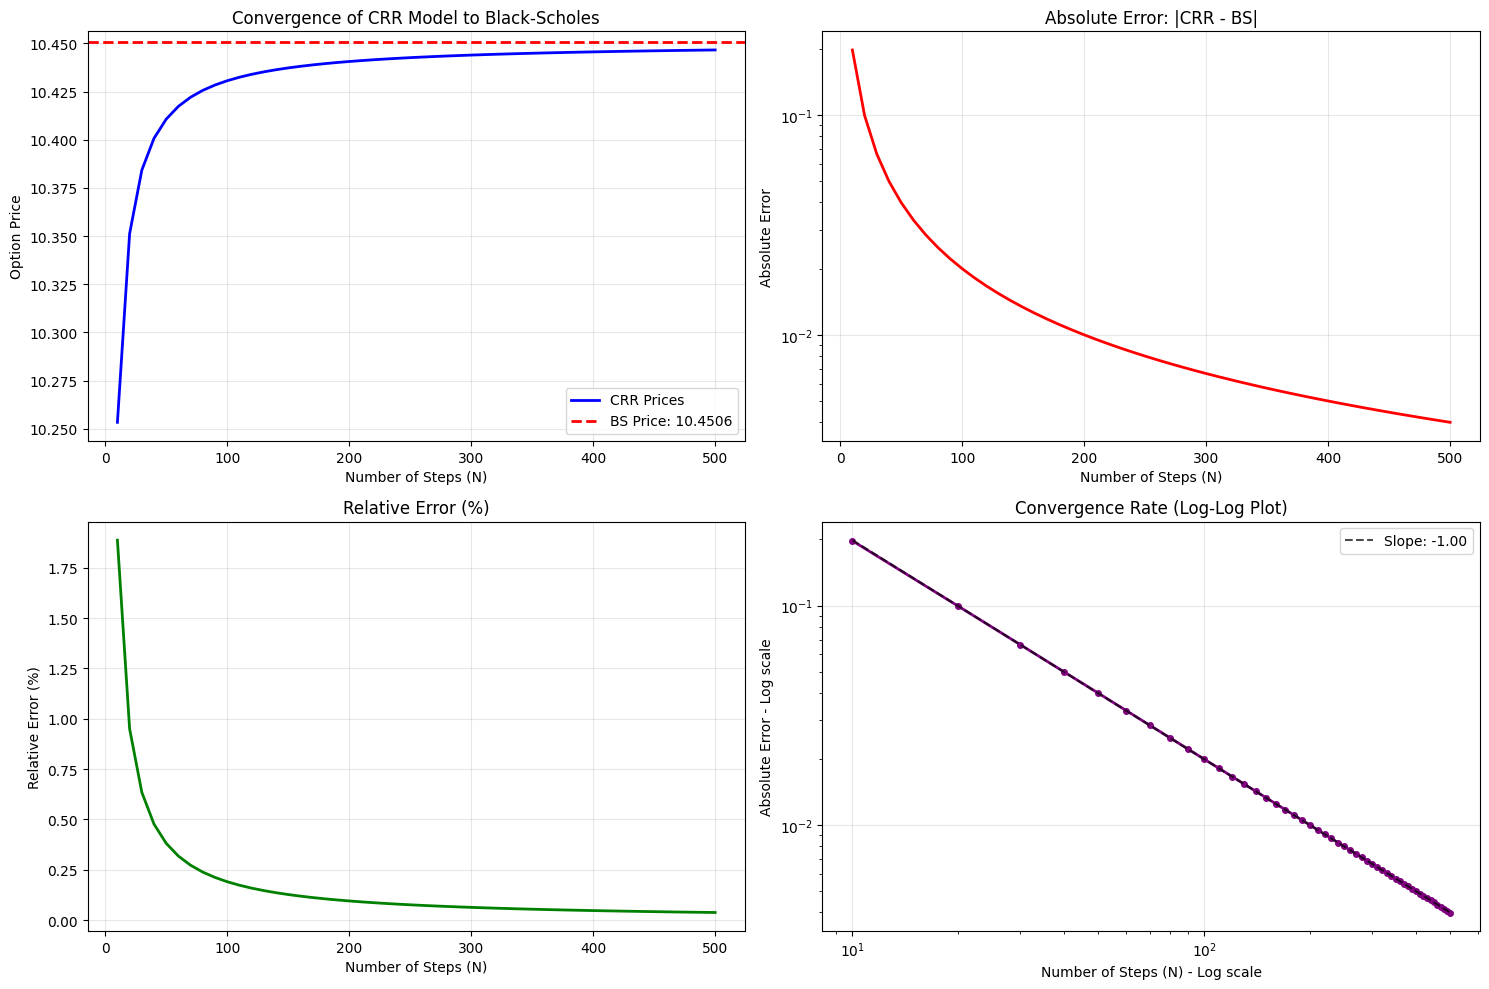

In [ ]:
plt.figure(figsize=(15, 10))

# 1. CRR Prices vs Black-Scholes
plt.subplot(2, 2, 1)
plt.plot(N_values, crr_prices, 'b-', linewidth=2, label='CRR Prices')
plt.axhline(y=bs_price, color='r', linestyle='--', linewidth=2, label=f'BS Price: {bs_price:.4f}')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.title('Convergence of CRR Model to Black-Scholes')
plt.legend()
plt.grid(True, alpha=0.3)

# 2. Absolute Error
plt.subplot(2, 2, 2)
plt.plot(N_values, crr_errors, 'r-', linewidth=2)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Absolute Error')
plt.title('Absolute Error: |CRR - BS|')
plt.grid(True, alpha=0.3)
plt.yscale('log')  # Log scale shows convergence clearly

# 3. Relative Error (%)
plt.subplot(2, 2, 3)
relative_errors = [100 * err / bs_price for err in crr_errors]
plt.plot(N_values, relative_errors, 'g-', linewidth=2)
plt.xlabel('Number of Steps (N)')
plt.ylabel('Relative Error (%)')
plt.title('Relative Error (%)')
plt.grid(True, alpha=0.3)

# 4. Log-Log Error Convergence
plt.subplot(2, 2, 4)
plt.loglog(N_values, crr_errors, 'purple', linewidth=2, marker='o', markersize=4)
plt.xlabel('Number of Steps (N) - Log scale')
plt.ylabel('Absolute Error - Log scale')
plt.title('Convergence Rate (Log-Log Plot)')
plt.grid(True, alpha=0.3)

# Trend line for convergence slope
z = np.polyfit(np.log(N_values), np.log(crr_errors), 1)
trend_line = np.exp(z[1]) * N_values ** z[0]
plt.loglog(N_values, trend_line, 'k--', alpha=0.7, label=f'Slope: {z[0]:.2f}')
plt.legend()

plt.tight_layout()
plt.show()

### Interpretation:
- The CRR price converges to the Black-Scholes price as the number of steps increases.
- Absolute and relative errors decrease, roughly proportional to 1/N.
- Log-log plot allows estimation of convergence rate, often near slope -1.
- Small oscillations for small N are also visible.

## 7. Key Statistics and Convergence Check

In [ ]:
print("\nConvergence Analysis:")
print(f"Black-Scholes Price: {bs_price:.6f}")
print(f"CRR Price (N=10): {crr_prices[0]:.6f}, Error: {crr_errors[0]:.6f}")
print(f"CRR Price (N=100): {crr_prices[9]:.6f}, Error: {crr_errors[9]:.6f}")
print(f"CRR Price (N=500): {crr_prices[-1]:.6f}, Error: {crr_errors[-1]:.6f}")

# Steps needed for error < 0.1%
tolerance = 0.001 * bs_price
steps_to_converge = next((i, N) for i, (N, err) in enumerate(zip(N_values, crr_errors)) if err < tolerance)
print(f"Steps needed for <0.1% error: {steps_to_converge[1]} steps")


Convergence Analysis:
Black-Scholes Price: 10.450584
CRR Price (N=10): 10.253409, Error: 0.197175
CRR Price (N=100): 10.430612, Error: 0.019972
CRR Price (N=500): 10.446585, Error: 0.003998
Steps needed for <0.1% error: 200 steps


## 8. Odd-Even Oscillation Effect
For small N, the CRR model shows slight oscillations depending on whether the number of steps is odd or even. Let's visualize this effect.

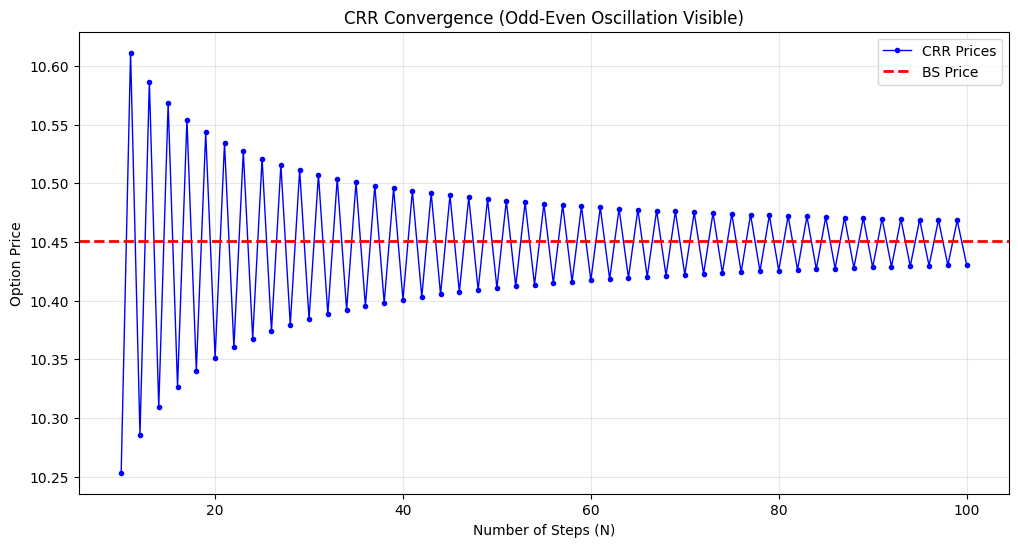

In [ ]:
plt.figure(figsize=(12, 6))

N_small = np.arange(10, 101)
crr_small = []

for N in N_small:
    dt = T / N
    u = np.exp(sigma * np.sqrt(dt))
    d = 1 / u
    p = (np.exp(r * dt) - d) / (u - d)
    ST = S0 * (u ** np.arange(N, -1, -1)) * (d ** np.arange(0, N+1, 1))
    option_values = np.maximum(ST - K, 0)
    for i in range(N-1, -1, -1):
        option_values = np.exp(-r * dt) * (p * option_values[:-1] + (1-p) * option_values[1:])
    crr_small.append(option_values[0])

plt.plot(N_small, crr_small, 'b-', linewidth=1, marker='o', markersize=3, label='CRR Prices')
plt.axhline(y=bs_price, color='r', linestyle='--', linewidth=2, label='BS Price')
plt.xlabel('Number of Steps (N)')
plt.ylabel('Option Price')
plt.title('CRR Convergence (Odd-Even Oscillation Visible)')
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

### Interpretation:
- For small number of steps, CRR prices oscillate slightly depending on step parity (odd/even).
- As N increases, these oscillations diminish and prices stabilize close to the Black-Scholes value.